In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from math import sqrt 
#plt.subplot?

# Subplots

1. Creation of grid of figure with using plt.subplot() 
2. creation of legend for each subplot
3. share y axes for subplots to plot figures in the same y scales for better comparison 

<IPython.core.display.Javascript object>


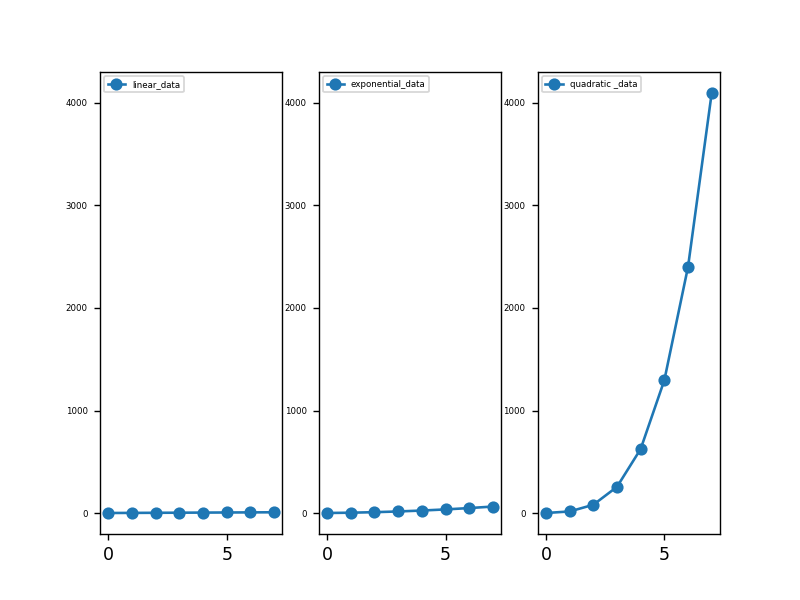

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.]),
 <a list of 7 Text yticklabel objects>)

In [2]:
linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2
quadratic_data =linear_data **4 
plt.figure()  

# subplot with 1 row, 2 columns, and current axis is 1st subplot axes
ax1 = plt.subplot(1, 3, 1)   # Return a subplot axes positioned by the given grid definition.
plt.plot(linear_data, '-o', label = 'linear_data')
plt.legend(loc = 'upper left', fontsize = 5 )  
plt.yticks( fontsize = 5)

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
ax2 = plt.subplot(1, 3, 2, sharey = ax1)
plt.plot(exponential_data, '-o', label = 'exponential_data' )
plt.legend(loc = 'upper left', fontsize = 5 )
plt.yticks( fontsize = 5)

# subplot with 1 row, 2 columns, and current axis is 2nd subplot axes
ax3 = plt.subplot(1, 3, 3, sharey = ax1)
plt.plot(quadratic_data , '-o', label = 'quadratic _data' )
plt.legend(loc = 'upper left', fontsize = 5 )
plt.yticks( fontsize = 5)

1. How to creat a grid of figures with the shred parameters (The same functionality but with using artist layer )

<IPython.core.display.Javascript object>


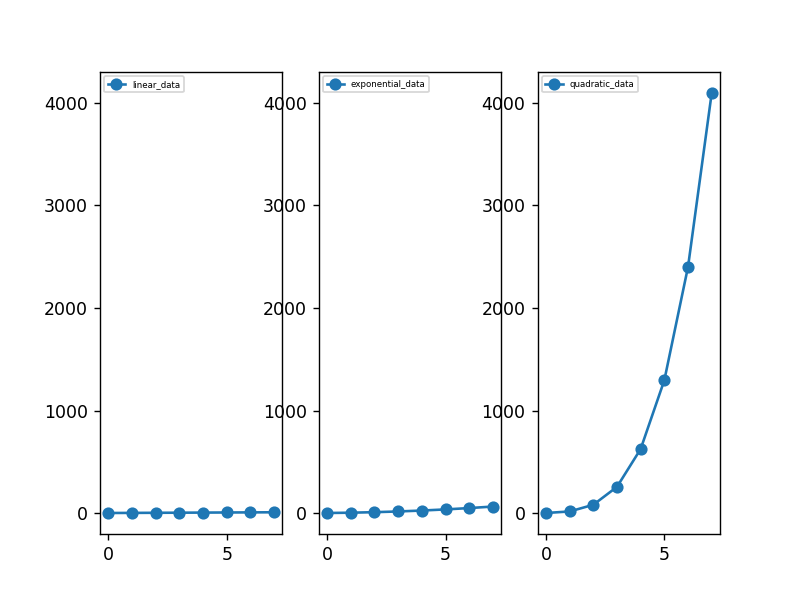

In [3]:
linear_data = np.array([1,2,3,4,5,6,7,8])
exponential_data = linear_data**2
quadratic_data =linear_data **4 



# create a 3x3 grid of subplots
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, sharex=True, sharey=True)
      
# plot the linear_data on different axes 
ax1.plot(linear_data, '-o', label = 'linear_data')
ax2.plot(exponential_data,'-o', label = 'exponential_data') 
ax3.plot(quadratic_data,'-o', label = 'quadratic_data')
# set inside tick labels to visible

for ax in plt.gcf().get_axes():   # get axes for current figure 
    ax.legend(loc = 'upper left', fontsize = 5)   # legend for all figures
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_visible(True)      # show tick values for both x and y axes
        # Matplotlib.axes.Axes.set_visible()
        

# necessary on some systems to update the plot
plt.gcf().canvas.draw()


# Histograms

1. using np.random.normal() method for sampling 
2. plotting Histograms in a grid 
3. showing how to craete a list of the axes objects and itterate over it 
4. how to set x and y ticks and labels for each histogram in a loop by using axes object 

<IPython.core.display.Javascript object>


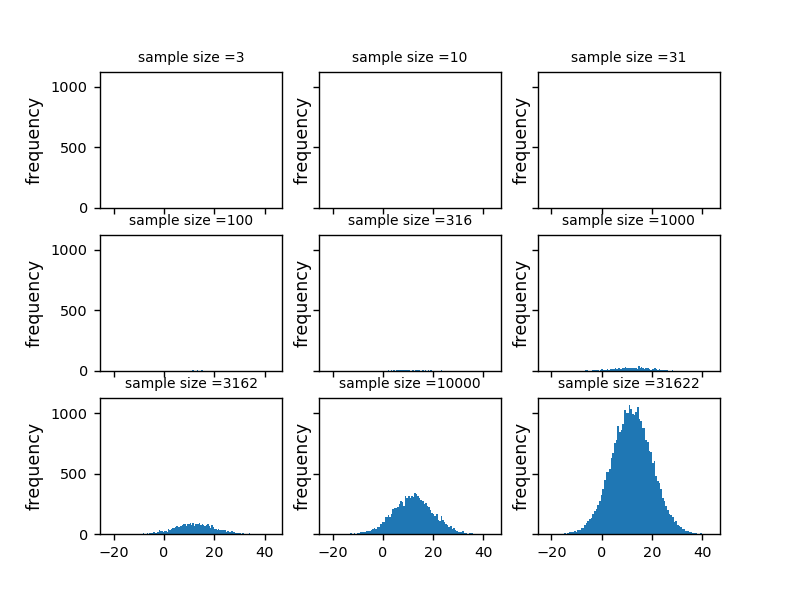

In [4]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8 , ax9  )) = plt.subplots(3, 3, sharex=True, sharey = True )
# each  tuple represents one row 


axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8 , ax9 ]

# draw n = 10, 100, 1000, and 10000 ... samples from the normal distribution and plot corresponding histograms
for n in range(0,len(axs)):
    sample_size = int (sqrt(10**(n+1)))
    sample = np.random.normal(loc=12.0, scale = 8.0, size = sample_size) 
    axs[n].hist(sample, bins= 100)    # bins = bins number 
    axs[n].set_ylabel('frequency')
    axs[n].tick_params(labelsize = 'small')
    axs[n].set_title('sample size ={}'.format(sample_size), fontsize = 8)
    
    
    
#  sample = np.random.normal(loc=2.0, scale=0.0, size = 10) : 
#  Draw 10 random samples from a normal (Gaussian) distribution. 
# loc = Mean (“centre”) of the distribution.   scale=1.0 is standard deviation 
#  above code results : 
#  array([ 0.56162284, -0.09921725, -1.3890961 ,  0.44920886,  1.97884025,
#        0.80186391, -1.0368558 ,  1.41947243, -0.2062087 ,  1.65527233])

1. How to use gridspec to divide one plot to different sections 
2. Horizontal Histogram

<IPython.core.display.Javascript object>


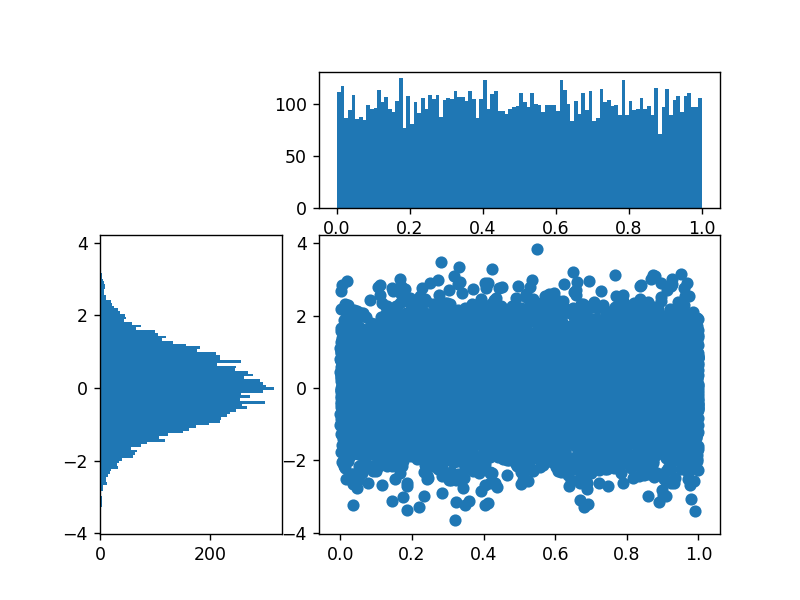

In [5]:
# use gridspec to partition the figure into subplots
import matplotlib.gridspec as gridspec

plt.figure()
Y = np.random.normal(loc = 0.0, scale=1.0, size=10000)    # scale : Standard deviation (spread or “width”) of the distribution. Must be non-negative.
X = np.random.random(size = 10000)

gspec = gridspec.GridSpec(3, 3)

top_histogram = plt.subplot(gspec[0, 1:])
side_histogram = plt.subplot(gspec[1:, 0])
lower_right = plt.subplot(gspec[1:, 1:])


lower_right.scatter(X, Y)
top_histogram.hist(X, bins=100)
s = side_histogram.hist(Y, bins=100, orientation='horizontal')



In [7]:
# clear the histograms and plot normed histograms
top_histogram.clear()
top_histogram.hist(X, bins=100, normed=True)
side_histogram.clear()
side_histogram.hist(Y, bins=100, orientation='horizontal', normed=True)
# flip the side histogram's x axis
side_histogram.invert_xaxis()

In [8]:
# change axes limits
for ax in [top_histogram, lower_right]:
    ax.set_xlim(0, 1)
for ax in [side_histogram, lower_right]:
    ax.set_ylim(-5, 5)

![MOOC DATA](moocdata.png "Image")

# Box and Whisker Plots

1. How to create a df with 812 rows with np.random
2. How to plot a boxplot 

<IPython.core.display.Javascript object>


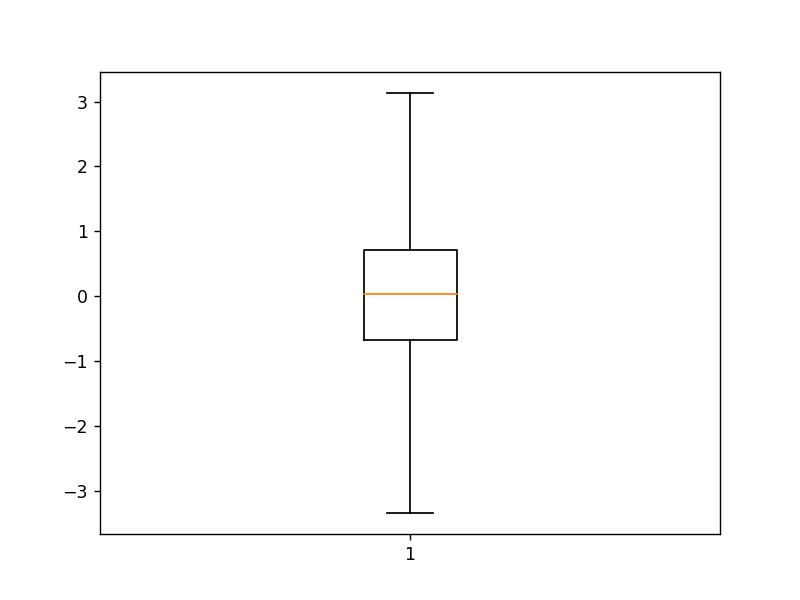

In [10]:
import pandas as pd 

normal_sample = np.random.normal(loc = 0.0, scale = 1.0, size = 812)
random_sample = np.random.random(size = 812)
gamma_sample =  np.random.gamma (2, size= 812 )

df = pd.DataFrame({'normal': normal_sample, 
                   'random': random_sample, 
                   'gamma': gamma_sample})
df.describe()

plt.figure()
# create a boxplot of the normal data, assign the output to a variable to supress output
_ = plt.boxplot(df['normal'], whis = 'range')


How to plot 3 different dfs with calling one boxplot 

<IPython.core.display.Javascript object>


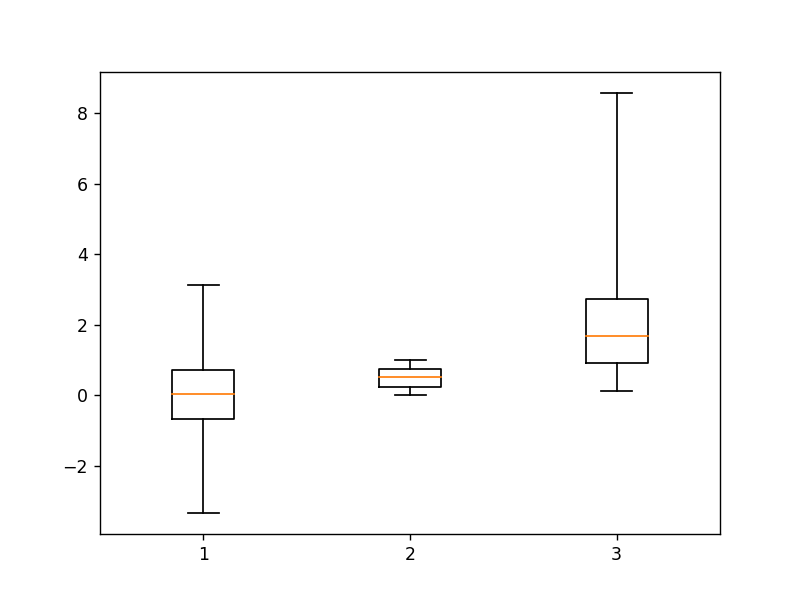

In [11]:

# clear the current figure
plt.clf()
# plot boxplots for all three of df's columns
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis = 'range')

<IPython.core.display.Javascript object>


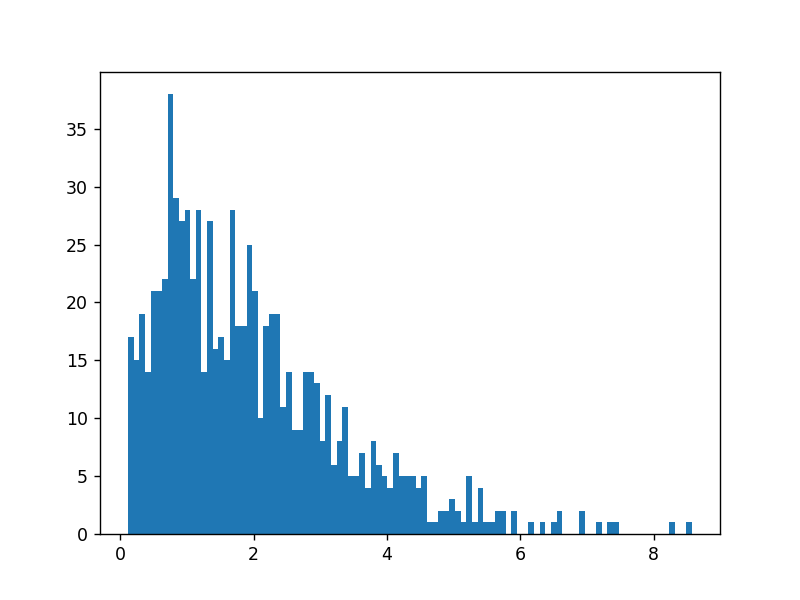

In [12]:
plt.figure()
_ = plt.hist(df['gamma'], bins = 100)

<IPython.core.display.Javascript object>


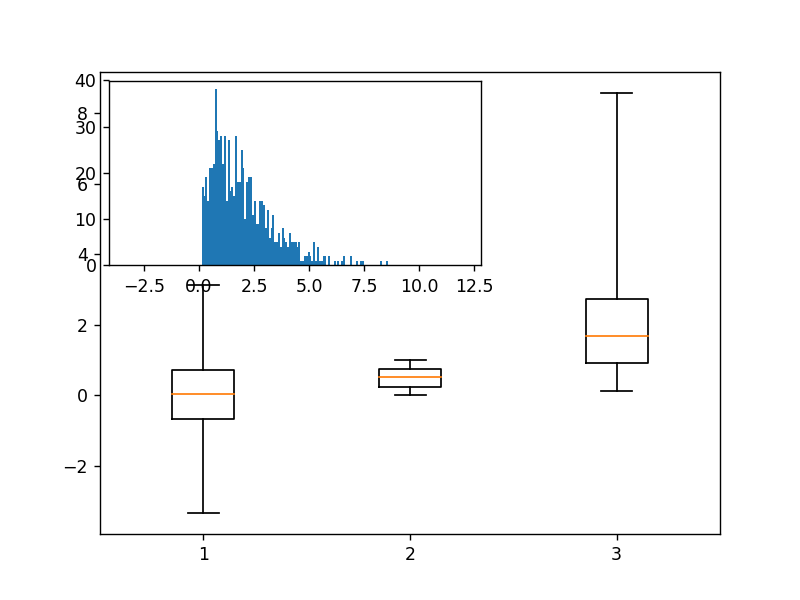

In [13]:
import mpl_toolkits.axes_grid1.inset_locator as mpl_il

plt.figure()
plt.boxplot([ df['normal'], df['random'], df['gamma'] ], whis='range')
# overlay axis on top of another 
ax2 = mpl_il.inset_axes(plt.gca(), width='60%', height='40%', loc=2)
ax2.hist(df['gamma'], bins=100)
ax2.margins(x=0.5)

In [14]:
# switch the y axis ticks for ax2 to the right side
ax2.yaxis.tick_right()

<IPython.core.display.Javascript object>


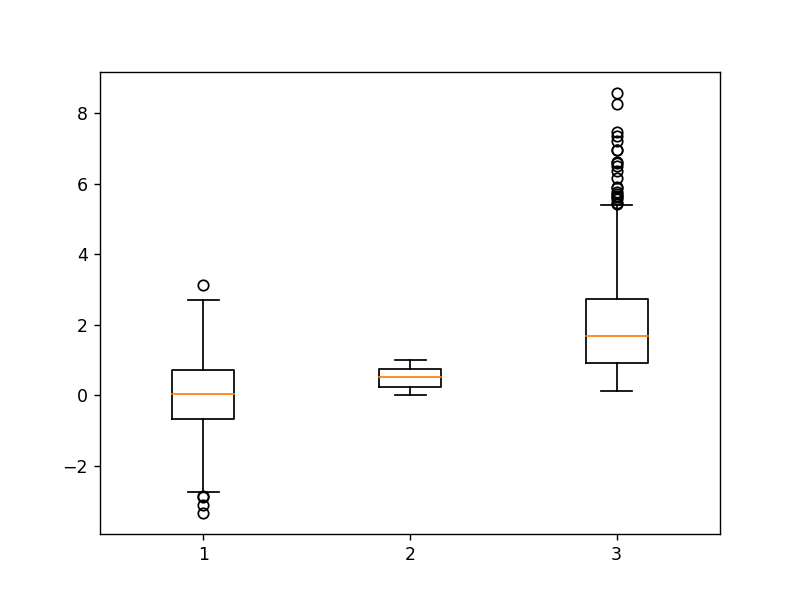

In [15]:
# if `whis` argument isn't passed, boxplot defaults to showing 1.5*interquartile (IQR) whiskers with outliers
plt.figure()
_ = plt.boxplot([ df['normal'], df['random'], df['gamma'] ] )

# Heatmaps

<IPython.core.display.Javascript object>


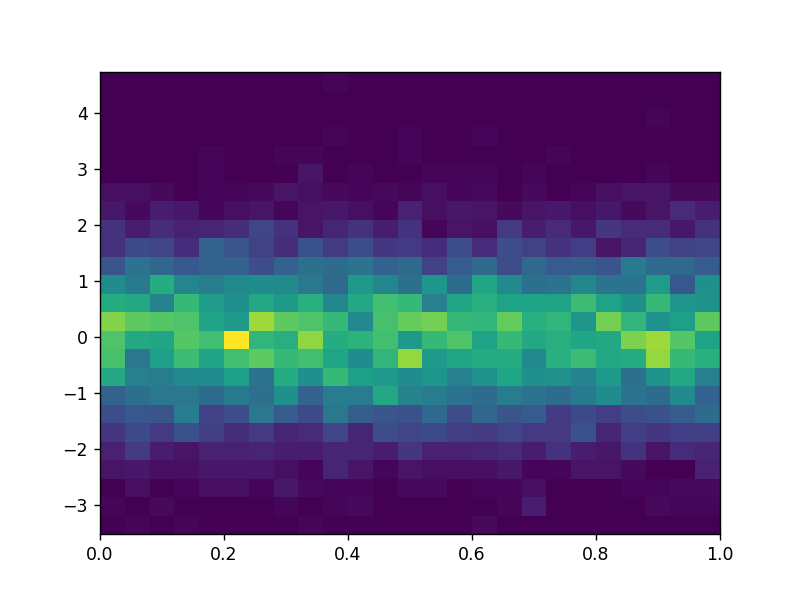

In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

plt.figure()

Y = np.random.normal(loc=0.0, scale=1.0, size=10000)
X = np.random.random(size = 10000)
_ = plt.hist2d(X, Y, bins = 25)
plt.show()

<IPython.core.display.Javascript object>


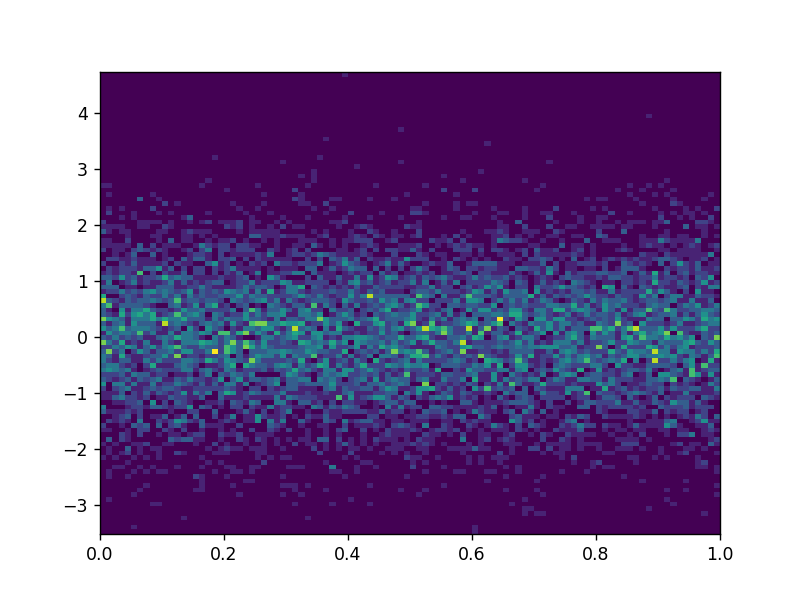

In [17]:
plt.figure()
_ = plt.hist2d(X, Y, bins=100)
plt.show()

<IPython.core.display.Javascript object>


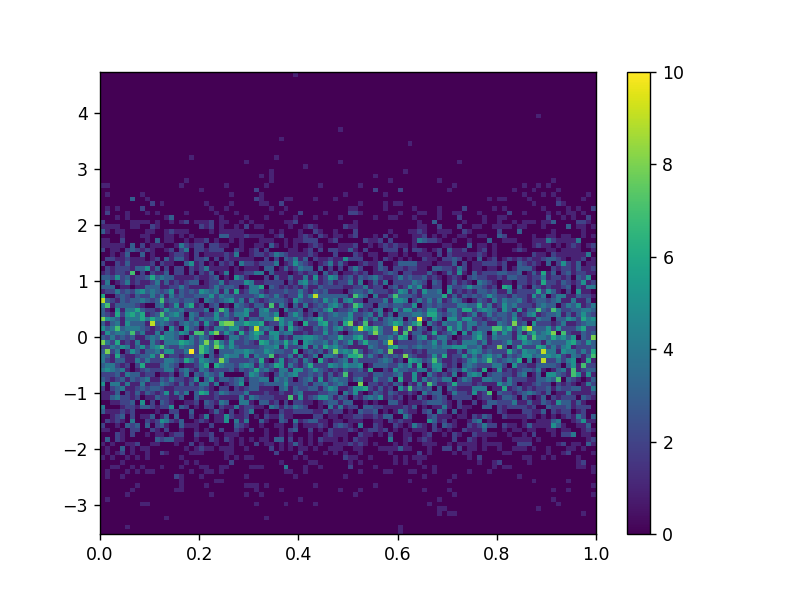

In [18]:
# add a colorbar legend
plt.figure()
_ = plt.hist2d(X, Y, bins=100)
plt.colorbar()
plt.show()

# Animations (using backend )

<IPython.core.display.Javascript object>


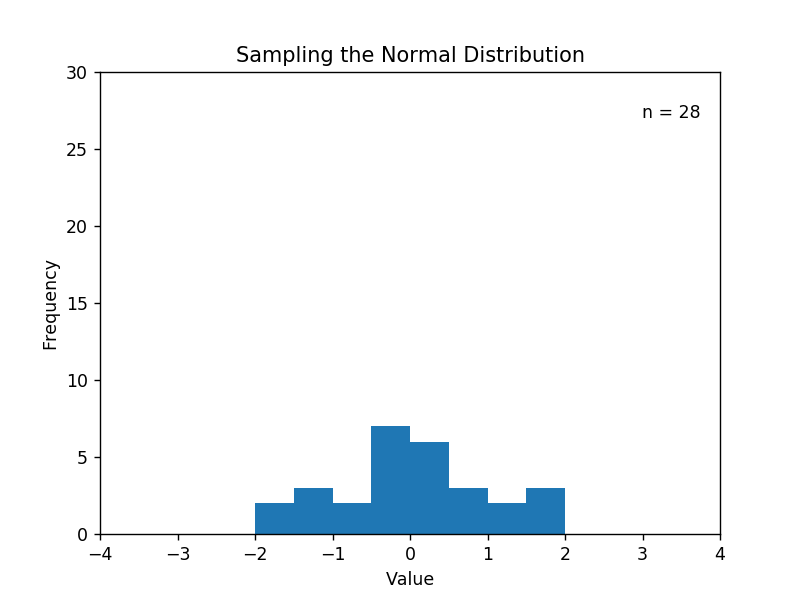

In [19]:
# A nice example of how sampling from a distribution an be used with an animation.

%matplotlib notebook  
# %matplotlib inline in a Notebook causes plots to be shown as static images, only 1 
# call to %matplotlib inline is required. %matplotlib notebook in a Notebook enables some interactive features.
                     
import matplotlib.animation as animation
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 


n = 100
x = np.random.randn(n) # Return a sample (or samples) from the “standard normal” distribution.

# create the function that will do the plotting, where curr is the current frame
def update(curr):
    # check if animation is at the last frame, and if so, stop the animation a 
    if curr == n: 
        a.event_source.stop()  # if the current frame is at the end of the list stop. a is the animation object 
    plt.cla()    # Clear the current axes.
    bins = np.arange(-4, 4, 0.5)  # Return evenly spaced values within a given interval.
    plt.hist(x[:curr], bins=bins) # plot histogram using values of x up to current value usig slicing
    # since we want our bins to be evenly spaced we creat use mp.arange. this will ensure that the bins dont change 
    
    plt.axis([-4, 4, 0, 30])  # axis([xmin, xmax, ymin, ymax]) The axis limits to be set to prevent auto scaling 
    plt.gca().set_title('Sampling the Normal Distribution')
    plt.gca().set_ylabel('Frequency')
    plt.gca().set_xlabel('Value')
    plt.annotate('n = {}'.format(curr), [3,27])   # to show how many samples .  [3,27] set the location of legend
    
    
fig = plt.figure()
a = animation.FuncAnimation(fig, update, interval = 100) # it build a an animation by iteratively calling a defined function 
# animation.FuncAnimation calls update func every few ms and pass the frame number between 0 to 100 
# interval : the amount of time we need between  updates in ms 



# Interactivity

<IPython.core.display.Javascript object>


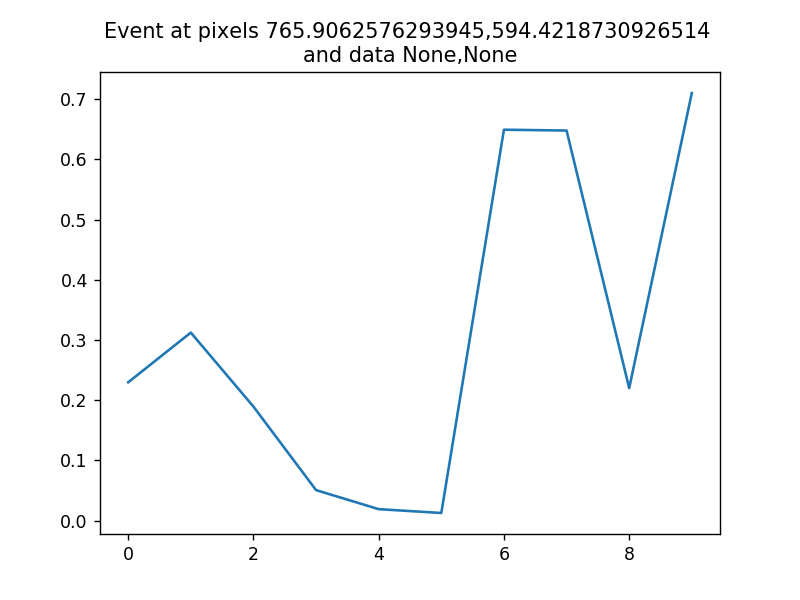

7

In [20]:
#  example of Interactivity in matplotlib  - button_press_event
%matplotlib notebook  

import matplotlib.animation as animation
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 

plt.figure()
data = np.random.rand(10)
plt.plot(data)

def onclick(event):    #  event: a piece of data which is associated with a function call.
 
    #plt.cla()   # Clear the current axes.
    #plt.plot(data)
    plt.gca().set_title('Event at pixels {},{} \nand data {},{}'.format(event.x, event.y, event.xdata, event.ydata))

#Finally, we have to connect this events to an event listener and
#this process is usually called wiring it up      
# tell mpl_connect we want to pass a 'button_press_event' into onclick when the event is detected
# get th canvas.mpl_connect of the current figure and passing an string as 'button_press_event' and a reference to the function 
# lists of events : https://matplotlib.org/users/event_handling.html
plt.gcf().canvas.mpl_connect('button_press_event', onclick)




<IPython.core.display.Javascript object>


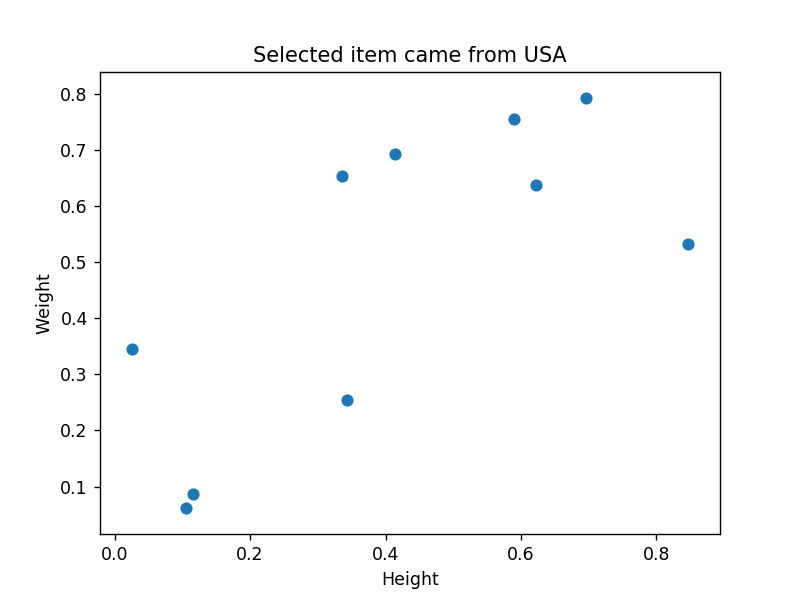

(7,      height   origin    weight
 0  0.621766      USA  0.636496
 1  0.116192    Chile  0.086828
 2  0.413999  Germany  0.693042
 3  0.105706   Canada  0.060917
 4  0.846306   Mexico  0.531503
 5  0.335532       UK  0.652792
 6  0.589284   Brazil  0.755345
 7  0.343593    China  0.255076
 8  0.026033     Iraq  0.345441
 9  0.695767    India  0.793207)

In [21]:
# example of Interactivity in matplotlib  - pick_event
%matplotlib notebook  

import matplotlib.animation as animation
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from random import shuffle


origins = ['China', 'Brazil', 'India', 'USA', 'Canada', 'UK', 'Germany', 'Iraq', 'Chile', 'Mexico']

shuffle(origins) # Shuffle a list items 
df = pd.DataFrame({'height': np.random.rand(10),
                   'weight': np.random.rand(10),
                   'origin': origins})
plt.figure()
# picker=5 means the mouse doesn't have to click directly on an rendered event, but can be up to 5 pixels away
plt.scatter(df['height'], df['weight'], picker=5)
plt.gca().set_ylabel('Weight')
plt.gca().set_xlabel('Height')

def onpick(event):
    origin = df.iloc[event.ind[0]]['origin'] # event.ind = pick_event get ind[0] value that correspond to the data in df  
    plt.gca().set_title('Selected item came from {}'.format(origin))

# tell mpl_connect we want to pass a 'pick_event' into onpick when the event is detected
plt.gcf().canvas.mpl_connect('pick_event', onpick) , df

